In [1]:
# Data wrangling
import numpy as np
import pandas as pd

# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance, kelbow_visualizer, silhouette_visualizer

## -- Machine learning -- ##
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from kmodes.kmodes import KModes            # clustering categorical data
from kmodes.kprototypes import KPrototypes  # clustering mixed data

# Didatic purposes
import string
from ipywidgets import interact

In [2]:
scatter_kwargs = dict(palette='viridis', alpha=0.8, linewidth=0)

In [3]:
# Simulate clusters
X,y = datasets.make_blobs(n_samples=int(1E3), n_features=2, centers=4, cluster_std=.8, random_state=0)
df = pd.DataFrame(X, columns=list(string.ascii_uppercase[:X.shape[1]]))
df.head()

,A,B
0,-2.256086,7.858356
1,0.568548,3.953328
2,-2.602152,8.418937
3,-2.625338,2.063689
4,2.286564,1.227960


In [37]:
model = GaussianMixture(n_components=4, covariance_type='spherical')
model.fit(X)

GaussianMixture(covariance_type='spherical', n_components=4)

In [8]:
model.means_
model.covariances_
model.weights_


array([0.247801  , 0.24902054, 0.2521594 , 0.25101906])

In [13]:
model.bic(X)

7475.928561883233

In [16]:
model.predict(X)[:5]

array([3, 1, 3, 0, 2], dtype=int64)

In [18]:
model.predict_proba(X)[:5]

array([[1.06690606e-09, 5.43870188e-09, 4.47036452e-22, 9.99999993e-01],
       [1.87001920e-02, 9.81041706e-01, 2.57137974e-04, 9.63882315e-07],
       [9.41302197e-12, 4.11129219e-11, 2.49568344e-25, 1.00000000e+00],
       [9.99980760e-01, 1.92312544e-05, 8.71070480e-09, 8.40546996e-12],
       [9.56574332e-07, 7.16656227e-05, 9.99927378e-01, 2.93030421e-19]])

In [41]:
model.means_.T

array([[-1.28870348, -1.46742953,  0.91559017,  1.99506403],
       [ 7.85166035,  2.91770509,  4.2710942 ,  0.85900317]])

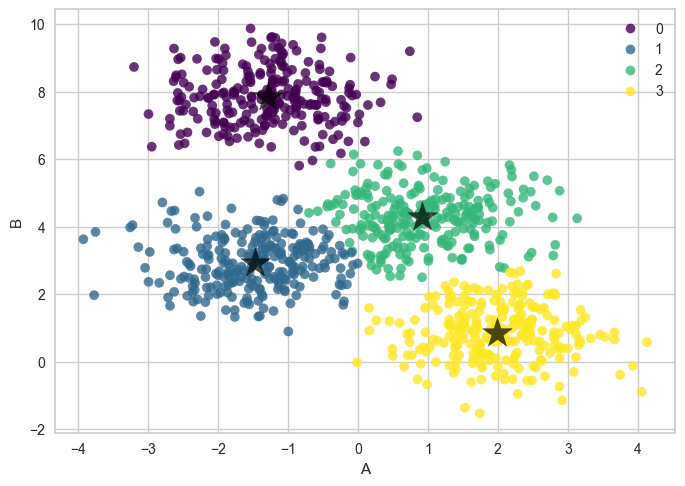

In [49]:
labels = model.predict(X)
ax = sns.scatterplot(data=df, x='A', y='B', hue=labels, **scatter_kwargs)
ax.scatter(*model.means_.T, s=500, c='black', alpha=0.7, marker='*')

In [34]:
results = []
k_range = range(1,9)
covariance_types = ['full', 'tied', 'diag', 'spherical']

for n_components in k_range:
  for covariance_type in covariance_types:
    mclust = GaussianMixture(n_components=n_components, warm_start=True, covariance_type=covariance_type)
    mclust.fit(X)
    results.append({
      'bic': mclust.bic(X),
      'n_components': n_components,
      'covariance_type': covariance_type,
    })

results = pd.DataFrame(results)
results

,bic,n_components,covariance_type
0,8357.218909,1,full
1,8357.218909,1,tied
2,8679.299153,1,diag
3,8889.310673,1,spherical
4,7976.527656,2,full
5,8165.511057,2,tied
6,8050.082533,2,diag
7,8036.917677,2,spherical
8,7526.427331,3,full
9,7736.187733,3,tied


In [35]:
results.sort_values(by='bic')

,bic,n_components,covariance_type
13,7419.260030,4,tied
15,7426.425803,4,spherical
17,7439.704792,5,tied
14,7450.141842,4,diag
19,7453.265575,5,spherical
21,7462.564408,6,tied
12,7475.990494,4,full
18,7480.652385,5,diag
25,7482.353238,7,tied
23,7483.883792,6,spherical


<Axes: xlabel='n_components', ylabel='bic'>

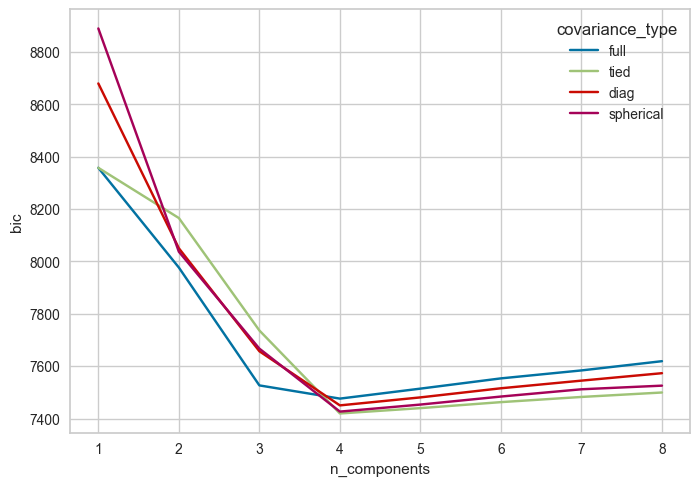

In [36]:
sns.lineplot(data=results, x='n_components', y='bic', hue='covariance_type')